In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def norm_minmax(imagem_samp):
    # Obtencao do valor minimo e maximo para futura normalizacao min-max
    imax = np.max(imagem_samp)
    imin = np.min(imagem_samp)

    # Normalizacao min-max novamente, para posteriormente reescalar os valores para 0 - 255
    imagem_samp_norm = ((imagem_samp - imin) / (imax - imin))
    imagem_samp_norm = imagem_samp_norm * 255

    # Transformando o tipo dos valores da imagem 'imagem_samp_norm' para 'np.uint8'
    imagem_samp_norm = imagem_samp_norm.astype(np.uint8)
    
    return imagem_samp_norm

In [3]:
def quantization(imagem_samp, B):
    ### QUANTIZACAO DA IMAGEM (QUANTIZATION)
    # Definicao da quantidades de bits que serao shiftados, primeiramente para a direita e posteriormente para a esquerda,
    # a fim de manter intactos os B bits mais significativos e zerar os 8 - B bits menos significativos
    shift = 8 - B

    imagem_samp = imagem_samp >> shift
    imagem_samp = imagem_samp << shift
    
    return imagem_samp

In [4]:
def plot_degraded_images(imagem_samp):
    
    
    plt.figure(figsize=(40,40))
    plt.subplot(811)
    plt.imshow(norm_minmax(imagem_samp)) ; plt.title("Original (8 BIT)")

    
    imagem_samp_norm = quantization(norm_minmax(imagem_samp), 7)
    plt.subplot(812)
    plt.imshow(imagem_samp_norm) ; plt.title("Degraded (7 BIT)")
    
    imagem_samp_norm = quantization(norm_minmax(imagem_samp), 6)
    plt.subplot(813)
    plt.imshow(imagem_samp_norm) ; plt.title("Degraded (6 BIT)")
    
    imagem_samp_norm = quantization(norm_minmax(imagem_samp), 5)
    plt.subplot(814)
    plt.imshow(imagem_samp_norm) ; plt.title("Degraded (5 BIT)")
    
    imagem_samp_norm = quantization(norm_minmax(imagem_samp), 4)
    plt.subplot(815)
    plt.imshow(imagem_samp_norm) ; plt.title("Degraded (4 BIT)")
    
    imagem_samp_norm = quantization(norm_minmax(imagem_samp), 3)
    plt.subplot(816)
    plt.imshow(imagem_samp_norm) ; plt.title("Degraded (3 BIT)")
    
    imagem_samp_norm = quantization(norm_minmax(imagem_samp), 2)
    plt.subplot(817)
    plt.imshow(imagem_samp_norm) ; plt.title("Degraded (2 BIT)")
    
    imagem_samp_norm = quantization(norm_minmax(imagem_samp), 1)
    plt.subplot(818)
    plt.imshow(imagem_samp_norm) ; plt.title("Degraded (1 BIT)")

# Teste de Quantização Padrão

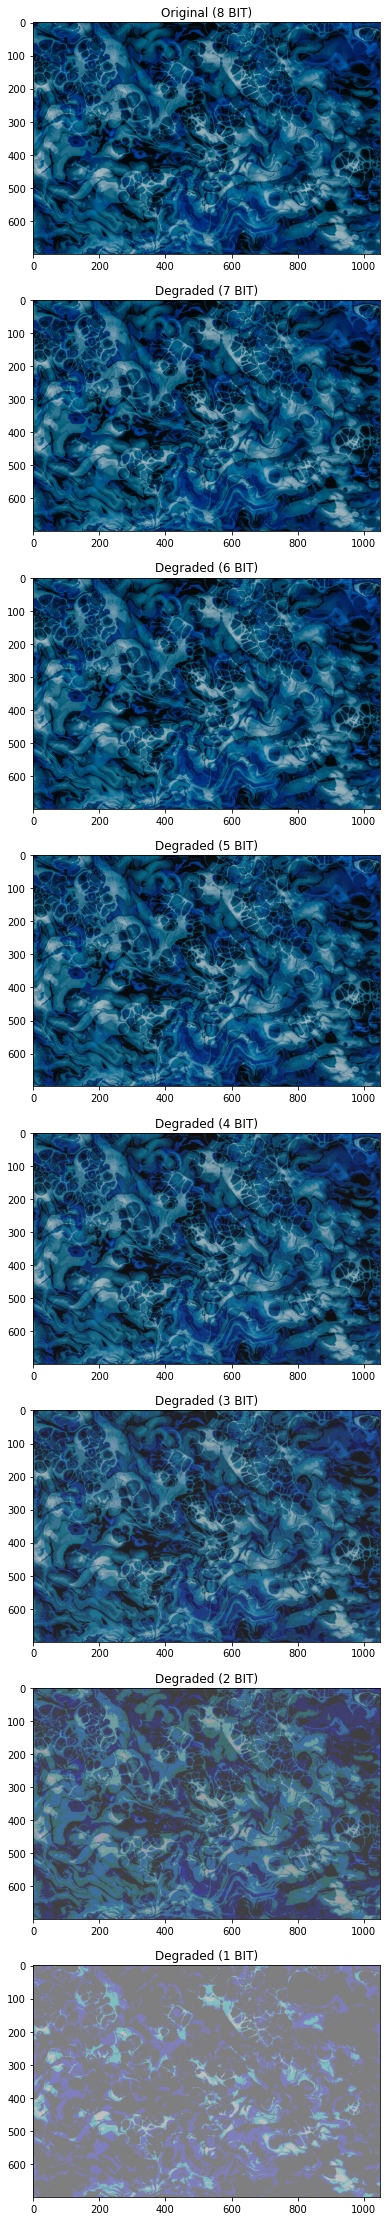

In [5]:
imagem_samp = imageio.imread('../images/raw/abstract_ocean.png').astype(np.uint8)
plot_degraded_images(imagem_samp)

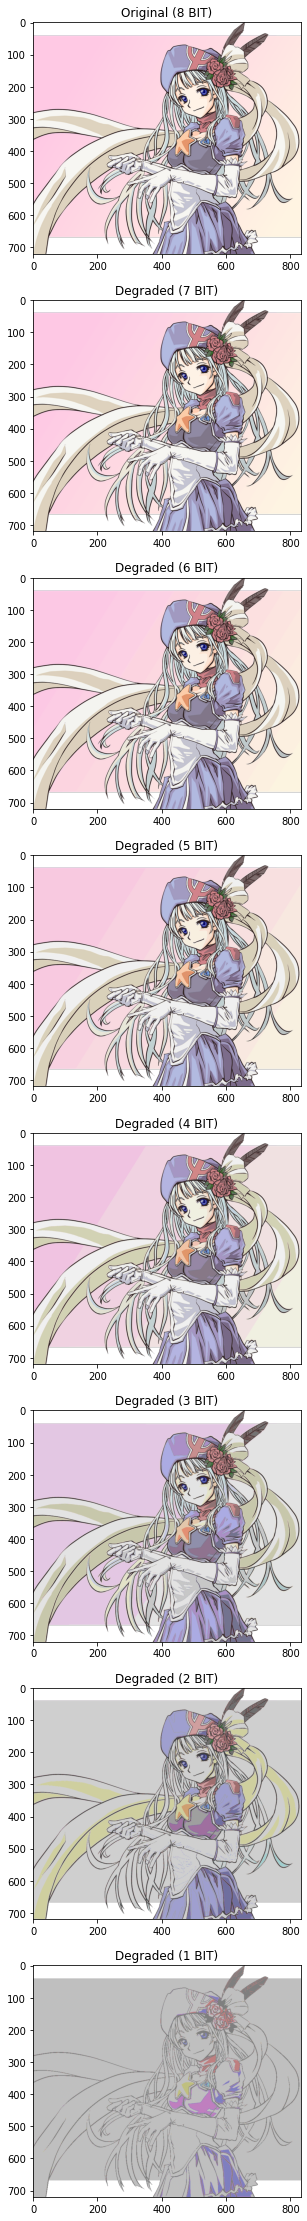

In [6]:
imagem_samp = imageio.imread('../images/raw/anime_girl.png').astype(np.uint8)
plot_degraded_images(imagem_samp)

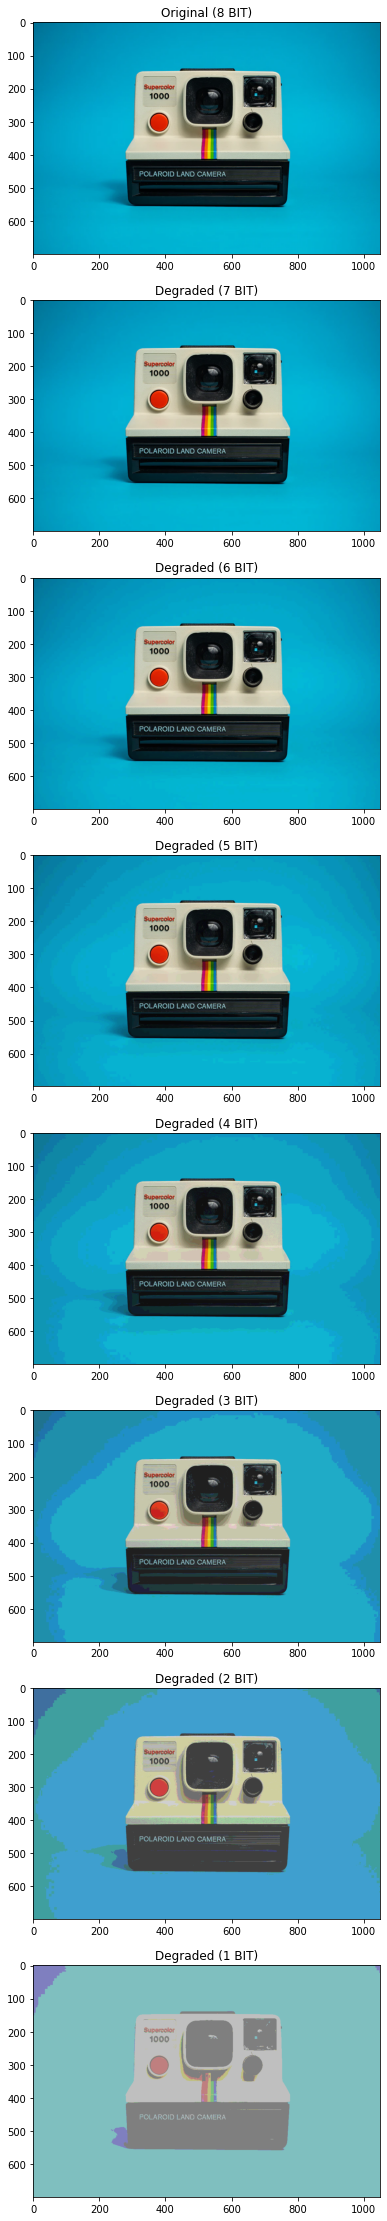

In [7]:
imagem_samp = imageio.imread('../images/raw/polaroid.png').astype(np.uint8)
plot_degraded_images(imagem_samp)

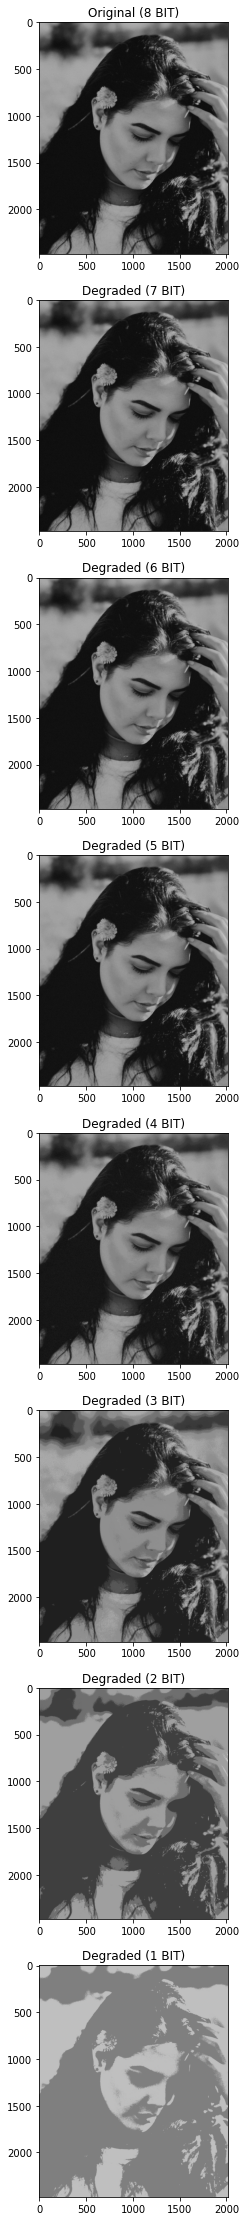

In [8]:
imagem_samp = imageio.imread('../images/raw/grayscale_selfie.png').astype(np.uint8)
plot_degraded_images(imagem_samp)

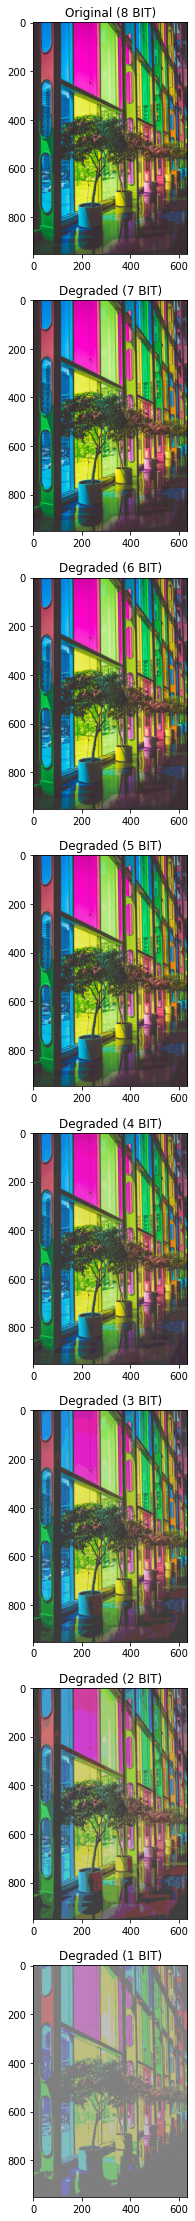

In [9]:
imagem_samp = imageio.imread('../images/raw/scenario_rainbow.png').astype(np.uint8)
plot_degraded_images(imagem_samp)

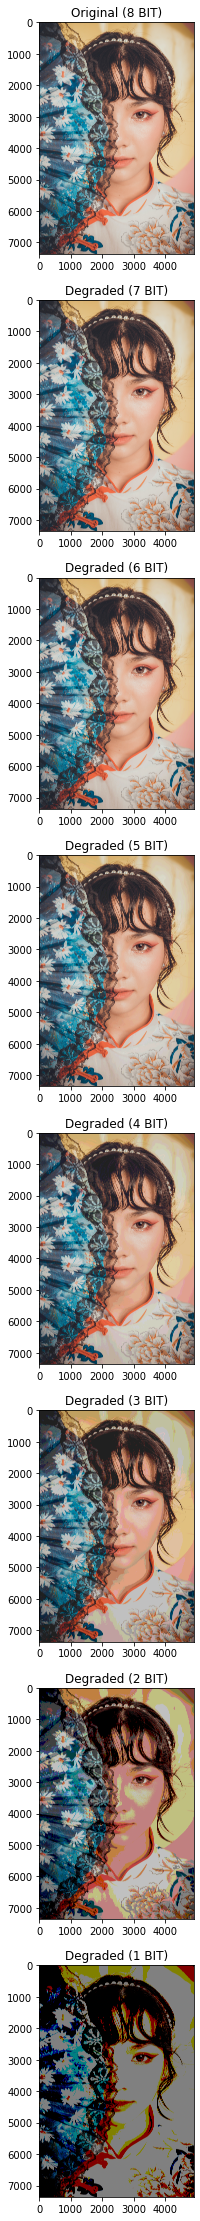

In [10]:
imagem_samp = imageio.imread('../images/raw/oriental_selfie.jpg').astype(np.uint8)
plot_degraded_images(imagem_samp)

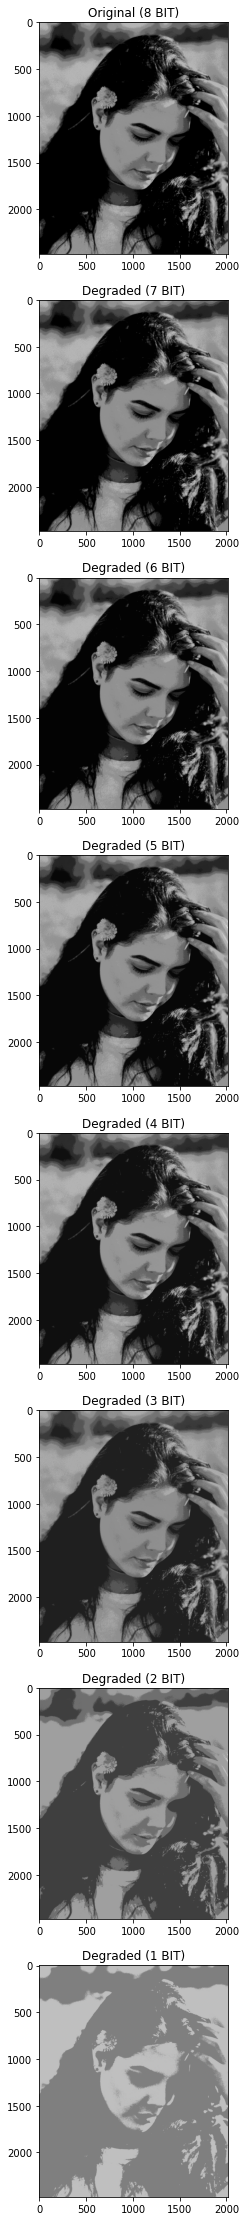

In [11]:
imagem_samp = imageio.imread('../images/raw/grayscale_selfie.png').astype(np.uint8)
imagem_samp = norm_minmax(imagem_samp)
plot_degraded_images(quantization(imagem_samp, 3))

# Resultado: 
  ## Preferível escolher imagens degradadas de 8 bits -> 3 bits ou 4 bits 